## Part 1. Boston House Dataset

Using the Boston House Dataset, predict per capita crime rate using the other variables in the dataset by leveraging the techniques of gradient descent.  In other words, per capita crime rate is the response, and the other variables are the predictors.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

# load dataset
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [2]:
# dataset description
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
# make dataset as dataframe
features = pd.DataFrame(boston.data, columns=boston.feature_names)
label = pd.DataFrame(boston.target, columns=['MEDV'])
df = pd.concat([features, label], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# EDA: correlation
df.corr()[['CRIM']].iloc[1:, ].sort_values('CRIM')

,CRIM
MEDV,-0.388305
B,-0.385064
DIS,-0.379670
RM,-0.219247
ZN,-0.200469
CHAS,-0.055892
PTRATIO,0.289946
AGE,0.352734
INDUS,0.406583
NOX,0.420972


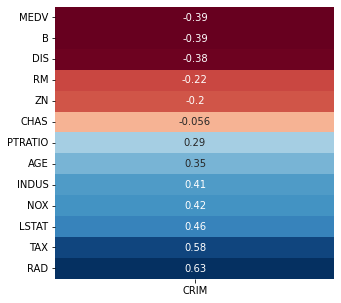

In [5]:
# EDA: correlation heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr()[['CRIM']].iloc[1:, ].sort_values('CRIM'), cmap='RdBu', annot=True, cbar=False)
plt.show()

#### I. For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

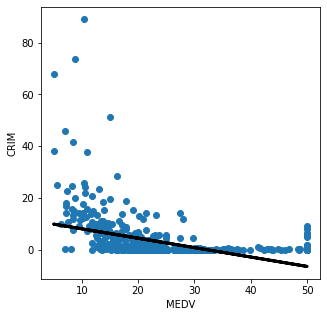

In [6]:
# sample plot: MEDV-CRIM

from sklearn.linear_model import LinearRegression

model0 = LinearRegression()
model0.fit(df[['MEDV']], df[['CRIM']])

plt.figure(figsize=(5, 5))
plt.scatter(df['MEDV'], df['CRIM'])
plt.xlabel('MEDV')
plt.ylabel('CRIM')
plt.plot(df['MEDV'], model0.predict(df[['MEDV']]), color='black', linewidth=3)
plt.show()

In [7]:
# For every predictor

x_names = df.drop('CRIM', axis=1).columns
y = df[['CRIM']]

r_squares = np.zeros(len(x_names))
mses = np.zeros(len(x_names))
coefs = np.zeros(len(x_names))

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# linear regression
model1 = LinearRegression()

# Loop over different predictors(k)
for i, k in enumerate(x_names):
    
    # fit
    model1.fit(df[[k]], y)
    
    # predict
    y_pred = model1.predict(df[[k]])
    
    # r_squares
    r_squares[i] = model1.score(df[[k]], y)
    
    # mses
    mses[i] = mean_squared_error(y, y_pred)
    
    # coefs (for 1-III)
    coefs[i] = model1.coef_[0]
    
    print(i, k, r_squares[i], mses[i])

0 ZN 0.04018790803211081 70.87287008180087
1 INDUS 0.16531007043075152 61.63380460821281
2 CHAS 0.0031238689633057426 73.60969205728198
3 NOX 0.17721718179269375 60.75457922267485
4 RM 0.048069116716083604 70.29091879798078
5 AGE 0.12442145175894637 64.65303491714717
6 DIS 0.1441493749253987 63.19631797509128
7 RAD 0.39125668674998915 44.94982519409268
8 TAX 0.3396142433788121 48.763121786603875
9 PTRATIO 0.0840684389437365 67.63271589699181
10 B 0.1482742394241312 62.89173649693517
11 LSTAT 0.2075909325343357 58.511770543534546
12 MEDV 0.15078046904975706 62.70667559997567


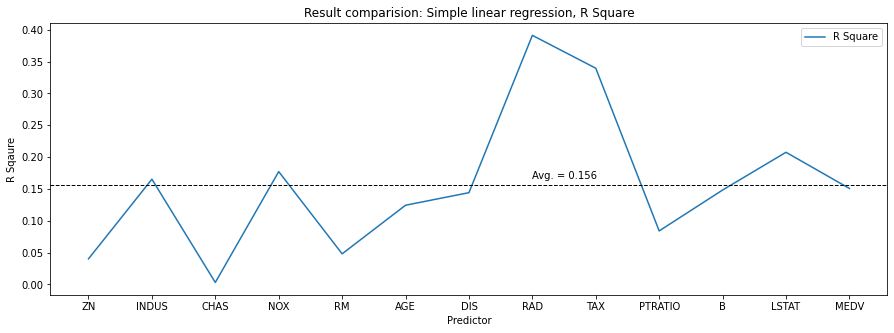

In [8]:
# r_square plot
plt.figure(figsize=(15, 5))
plt.title('Result comparision: Simple linear regression, R Square')
plt.plot(x_names, r_squares, label = 'R Square')
plt.legend()
plt.xlabel('Predictor')
plt.ylabel('R Sqaure')
plt.axhline(r_squares.mean(), color = 'black', linestyle = '--', linewidth = 1)
plt.annotate("Avg. = %.3f" %r_squares.mean(), xy = (7, r_squares.mean()+0.01))
plt.show()

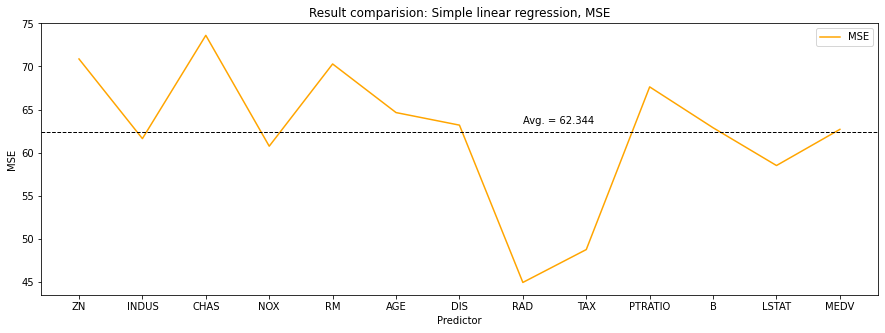

In [9]:
# mse plot
plt.figure(figsize=(15, 5))
plt.title('Result comparision: Simple linear regression, MSE')
plt.plot(x_names, mses, label = 'MSE', color='orange')
plt.legend()
plt.xlabel('Predictor')
plt.ylabel('MSE')
plt.axhline(mses.mean(), color = 'black', linestyle = '--', linewidth = 1)
plt.annotate("Avg. = %.3f" %mses.mean(), xy = (7, mses.mean()+1))
plt.show()

Among all predictors, the following seems to have statistically siginificant assocition with the response variable.

- RAD, TAX (positively correlated to CRIM, strong correlation)
- LSTAT, NOX, INDUS (positively correlated to CRIM, but weaker correlation)
- MEDV, B, DIS (negatively correlated to CRIM, weaker correlation)

#### II. Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [10]:
model2 = LinearRegression()

# fit
model2.fit(df[x_names], y)

# predict
y_pred = model2.predict(df[x_names])

# r_square, mse 
print(model2.score(df[x_names], y), mean_squared_error(y, y_pred))

0.45401038980421493 40.31606919025309


In [11]:
# coefficients
list(zip(model2.coef_[0], x_names))

[(0.04485521467003299, 'ZN'),
 (-0.0638548235876972, 'INDUS'),
 (-0.7491336105105765, 'CHAS'),
 (-10.31353491206691, 'NOX'),
 (0.4301305058640459, 'RM'),
 (0.001451643436183831, 'AGE'),
 (-0.9871757255028865, 'DIS'),
 (0.5882085914734952, 'RAD'),
 (-0.0037800163848595424, 'TAX'),
 (-0.2710805584722517, 'PTRATIO'),
 (-0.007537504888492234, 'B'),
 (0.1262113764595008, 'LSTAT'),
 (-0.19888682126562027, 'MEDV')]

In [12]:
# coefficients larger than 0.05
for i in list(zip(model2.coef_[0], x_names)):
    if np.abs(i[0]) > 0.05:
        print(i)

(-0.0638548235876972, 'INDUS')
(-0.7491336105105765, 'CHAS')
(-10.31353491206691, 'NOX')
(0.4301305058640459, 'RM')
(-0.9871757255028865, 'DIS')
(0.5882085914734952, 'RAD')
(-0.2710805584722517, 'PTRATIO')
(0.1262113764595008, 'LSTAT')
(-0.19888682126562027, 'MEDV')


Since scikit-learn does not provide detailed information about confidence interval, I cannot be certain of my result. However, as an arbitrarily threshold, if an absolute value of coef of a certain feature is larger than 0.05, I would say that for that predictor, we can reject the null hypothesis H0 : βj = 0.

#### III. How do your results from (1) compare to your results from (2)? Create a plot displaying the univariate regression coefficients from (1) on the x-axis, and the multiple regression coefficients from (2) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

In [13]:
# model1 coefficients
coefs

array([-7.39349774e-02,  5.09776331e-01, -1.89277655e+00,  3.12485312e+01,
       -2.68405122e+00,  1.07786227e-01, -1.55090168e+00,  6.17910927e-01,
        2.97422528e-02,  1.15198279e+00, -3.62796406e-02,  5.48804782e-01,
       -3.63159922e-01])

In [14]:
# model2 coefficents
model2.coef_[0]

array([ 4.48552147e-02, -6.38548236e-02, -7.49133611e-01, -1.03135349e+01,
        4.30130506e-01,  1.45164344e-03, -9.87175726e-01,  5.88208591e-01,
       -3.78001638e-03, -2.71080558e-01, -7.53750489e-03,  1.26211376e-01,
       -1.98886821e-01])

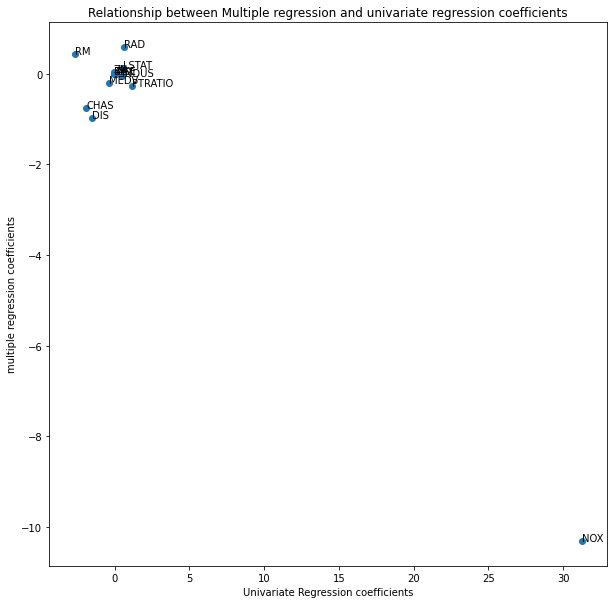

In [15]:
# plot
plt.figure(figsize=(10, 10))
plt.title('Relationship between Multiple regression and univariate regression coefficients')
plt.scatter(coefs, model2.coef_[0])
plt.xlabel('Univariate Regression coefficients')
plt.ylabel('multiple regression coefficients')

for i, name in enumerate(x_names):
    plt.annotate(name, (coefs[i], model2.coef_[0][i]))

plt.show()

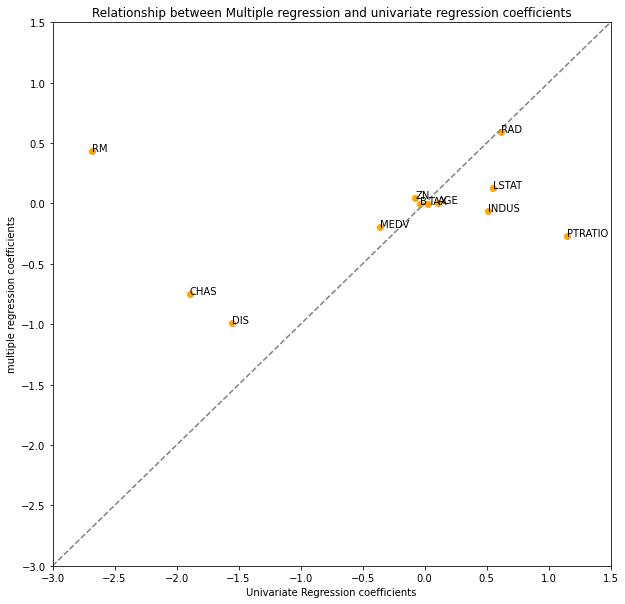

In [16]:
# plot except NOX
plt.figure(figsize=(10, 10))
plt.title('Relationship between Multiple regression and univariate regression coefficients')
plt.scatter(coefs[:3], model2.coef_[0][:3], color='orange')
plt.scatter(coefs[4:], model2.coef_[0][4:], color='orange')
plt.xlabel('Univariate Regression coefficients')
plt.ylabel('multiple regression coefficients')
plt.xlim([-3, 1.5])
plt.ylim([-3, 1.5])
plt.plot([-3, 1.5], [-3, 1.5], color='gray', linestyle='--')

for i, name in enumerate(x_names):
    plt.annotate(name, (coefs[i], model2.coef_[0][i]))

plt.show()

For the following predictors, there is little difference between simple regression coefficients and multiple regression coeffficients. 
 - RAD, TAX, ZN, B, TAX, AGE (data points along the diagonal line)

On, the other hand, for the following predictors, there is a somewhat clear difference between simple regression coefficients and multiple regression coeffficients. 
 - RM, CHAS, DIS: Higher multiple regression coefficients
 - NOX, LSTAT, INDUS, PTRATIO: higher simple regression coefficients
 
In a simple regression model, the slope represents the average effect of an increase in the (single) predictor, with no other predictors present.  
In a multiple regression model, the slope represents the average effect of an increase in a (single) predictor, while holding other predictors fixed.



#### IV. Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form:   Y = β0 + β1X + β2X2 + β3X3 + ϵ.

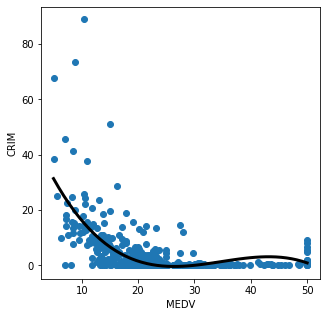

In [17]:
# sample plot: MEDV-CRIM

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Setup the pipeline steps: steps
steps = [('3poly', PolynomialFeatures(degree=3)),
         ('linreg', LinearRegression())]

# Create the pipeline: pipeline
pipeline0 = Pipeline(steps)

# Fit the pipeline to the train set
pipeline0.fit(df[['MEDV']], df[['CRIM']])

# Plot
plt.figure(figsize=(5, 5))
plt.scatter(df['MEDV'], df['CRIM'])
plt.xlabel('MEDV')
plt.ylabel('CRIM')

prediction_space = np.linspace(df['MEDV'].min(), df['MEDV'].max()).reshape(-1, 1)
plt.plot(prediction_space, pipeline0.predict(prediction_space), color='black', linewidth=3)

plt.show()

There seems to be non-linear association between the MEDV predictor and the response.

In [18]:
# For every predictor

x_names = df.drop('CRIM', axis=1).columns
y = df[['CRIM']]

pipe_r_squares = np.zeros(len(x_names))
pipe_mses = np.zeros(len(x_names))

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Setup the pipeline steps: steps
steps = [('3poly', PolynomialFeatures(degree=3)),
         ('linreg', LinearRegression())]

# Create the pipeline: pipeline
pipeline1 = Pipeline(steps)

# Loop over different predictors(k)
for i, k in enumerate(x_names):
    
    # fit
    pipeline1.fit(df[[k]], y)
    
    # predict
    y_pred = pipeline1.predict(df[[k]])
    
    # pipe_r_squares
    pipe_r_squares[i] = pipeline1.score(df[[k]], y)
    
    # pipe_mses
    pipe_mses[i] = mean_squared_error(y, y_pred)
    
    print(i, k, pipe_r_squares[i], pipe_mses[i])

0 ZN 0.05824197422258326 69.53975134087923
1 INDUS 0.2596578579195663 54.66713004643428
2 CHAS 0.002732749414103841 73.63857246546709
3 NOX 0.2969778956287359 51.91140503927489
4 RM 0.06778606116878616 68.83501252809684
5 AGE 0.17423099358657324 60.97508043384241
6 DIS 0.2778247730867365 53.32567849648546
7 RAD 0.40003687202422367 44.30149315551718
8 TAX 0.36888207966295994 46.60197422876375
9 PTRATIO 0.11378157744697515 65.43868706313435
10 B 0.1498398288022067 62.77613281417024
11 LSTAT 0.21793243242225624 57.74815047233412
12 MEDV 0.4202002565634152 42.812621589077985


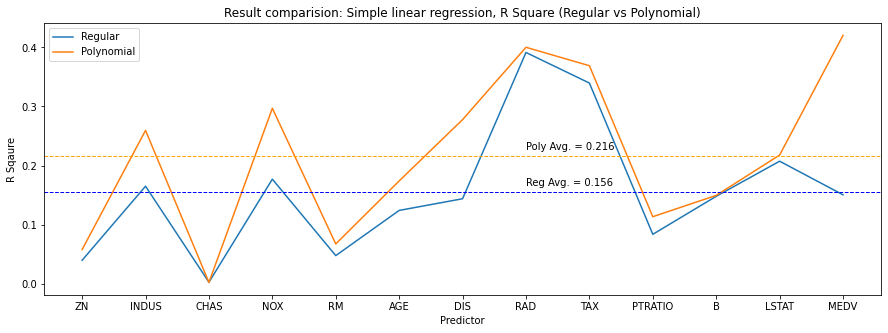

In [19]:
# r_square plot
plt.figure(figsize=(15, 5))
plt.title('Result comparision: Simple linear regression, R Square (Regular vs Polynomial)')
plt.plot(x_names, r_squares, label = 'Regular', color='tab:blue')
plt.plot(x_names, pipe_r_squares, label = 'Polynomial', color='tab:orange')
plt.legend()
plt.xlabel('Predictor')
plt.ylabel('R Sqaure')
plt.axhline(r_squares.mean(), color = 'blue', linestyle = '--', linewidth = 1)
plt.annotate("Reg Avg. = %.3f" %r_squares.mean(), xy = (7, r_squares.mean()+0.01))
plt.axhline(pipe_r_squares.mean(), color = 'orange', linestyle = '--', linewidth = 1)
plt.annotate("Poly Avg. = %.3f" %pipe_r_squares.mean(), xy = (7, pipe_r_squares.mean()+0.01))
plt.show()

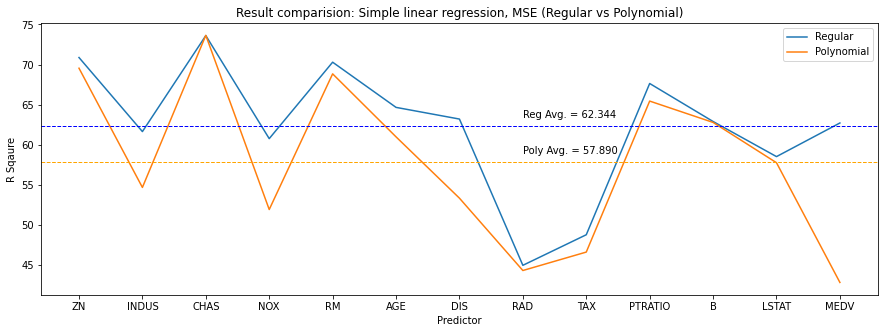

In [20]:
# MSE plot
plt.figure(figsize=(15, 5))
plt.title('Result comparision: Simple linear regression, MSE (Regular vs Polynomial)')
plt.plot(x_names, mses, label = 'Regular', color='tab:blue')
plt.plot(x_names, pipe_mses, label = 'Polynomial', color='tab:orange')
plt.legend()
plt.xlabel('Predictor')
plt.ylabel('R Sqaure')
plt.axhline(mses.mean(), color = 'blue', linestyle = '--', linewidth = 1)
plt.annotate("Reg Avg. = %.3f" %mses.mean(), xy = (7, mses.mean()+1))
plt.axhline(pipe_mses.mean(), color = 'orange', linestyle = '--', linewidth = 1)
plt.annotate("Poly Avg. = %.3f" %pipe_mses.mean(), xy = (7, pipe_mses.mean()+1))
plt.show()

There is evidence of non-linear association between the following predictors and the response.
 - INDUS, NOX, AGE, DIS, MEDV